In [0]:
#LIBRERÍAS PARA FUNCIONES MATEMÁTICAS Y DE MACHINE LEARNING
import numpy as np
import scipy as sc
#LÍBRERÍA PARA VISUALIZACIÓN DE DATOS
import matplotlib.pyplot as plt
#LIBRERÍA PARA DATASETS
from sklearn.datasets import make_circles

<function matplotlib.pyplot.show>

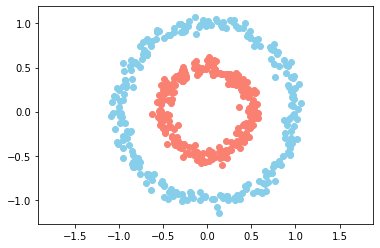

In [2]:
#DATASET CIRCULOS
n = 500    #Nº DE ELEMENTOS(PUNTOS) DEL DATASET
p = 2      #Nº DE ESTADOS POSIBLES DE LOS ELEMENTOS (ROJO/AZUL)

X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)
Y = Y[:, np.newaxis]
plt.scatter(X[Y[:,0] == 0,0], X[ Y[:,0] == 0,1], c = "skyblue")
plt.scatter(X[Y[:,0] == 1,0], X[ Y[:,0] == 1,1], c = "salmon")
plt.axis("equal")
plt.show

In [0]:
#CAPA INDIVIDUAL DE LA RED
class neural_layer():
  def __init__(self, n_con, n_neur, act_f):
    #FUNCIÓN DE ACTIVACIÓN DE LA CAPA
    self.act_f = act_f      
    #VALOR INICIAL ALEATORIO DE LOS BIASES                          
    self.b = np.random.rand(1, n_neur)     * 2 -1   
    #VALOR INICIAL ALEATORIO DE LOS PESOS (WEIGHTS) 
    self.W = np.random.rand(n_con, n_neur) * 2 -1     
    

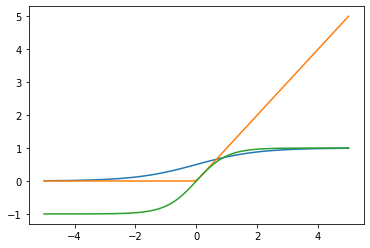

In [4]:
#FUNCIONES DE ACTIVACIÓN

#FUNCIÓN SIGMOIDE Y SU DERIVADA
sigm = (lambda x: 1/(1+ np.e **(-x)),      
        lambda x: x * (1-x))    
#FUNCIÓN RELU (RECTIFICADOR LINEAL) Y SU DERIVADA 
relu = (lambda x: np.maximum(0,x),        
        lambda x: (x>0)*1)

#FUNCIÓN TANGENTE HIPERBÓLICA Y SU DERIVADA                           
tanh = (lambda x: np.sinh(x) / np.cosh(x), 
        lambda x: 1 - (np.sinh(x) / np.cosh(x))**2)
_x = np.linspace(-5,5,100)

#REPRESENTACIÓN DE LAS TRES FUNCIONES
plt.plot(_x,sigm[0](_x))  #AZUL, SUS VALORES VAN DE 0 a 1
plt.plot(_x,relu[0](_x))  #NARANJA, ES LINEAL A PARTIR DE (0,0)
plt.plot(_x,tanh[0](_x))  #VERDE, PARECIDA A LA SIGMOIDE, SOLO QUE VA DE 1 a -1

In [0]:
#FUNCIÓN DE CREACIÓN DE LA RED NEURONAL
def create_nn(topology, act_f):           
  
  #LISTA VACÍA DONDE SE AÑADEN LAS CAPAS DE LA RED CON SU FUNCiÖN DE ACTIVACIÓN
  nn = []                                
  
  for l, layer in enumerate(topology[:-1]):
    
    nn.append(neural_layer(topology[l], topology[l+1], act_f))      
    
  return nn

In [6]:
#TOPOLOGÍA DE LA RED - NEURONAS DE CADA CAPA DE LA RED 
#EN LA PRIMERA HAY UNA POR CADA POSIBLE COLOR DE LOS PUNTOS (ROJO/AZUL)

topology = [p,4,6,2]                     

#RED NEURONAL, CON SU RESPECTIVA TOPOLOGÍA Y SU FUNCIÓN DE ACTIVACIÓN
neural_net = create_nn(topology,sigm)    

#FUNCiÖN DE COSTE Y SU DERIVADA
fcost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),          
         lambda Yp, Yr: (Yp - Yr))

#FUNCIÓN DE ENTRENAMIENTO
def train(neural_net, X, Y, fcost, lr =  0.05, train = True):
  out = [(None, X)]
  #FORWARD PASS > PASA LOS DATOS HACIA DE UNA CAPA A LA SIGUIENTE, 
  #MULTIPLICANDO PESOS, BIASES Y LA FUNC. DE ACTIVACIÓN
  for l, layer in enumerate(neural_net):                 
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)
  
    out.append((z, a))
    
  
  if train:
   #BACKPROPAGATION 
   #ROPAGACIÓN HACIA ATRÁS DEL ERROR Y CÁLCULO DE LAS DERIVADAS PARCIALES
     #MATRIZ CON LAS DERIVADAS PARCIALES NECESARIAS PARA EL DESCENSO DE GRADIENTE
    deltas = []     
 
    for l in reversed(range(0, len(neural_net))):      
      z = out[l+1][0]
      a = out[l+1][1]
     
      if l == (len(neural_net) - 1):
        deltas.insert(0, fcost[1](a, Y) * neural_net[l].act_f[1](a)) 
      else:
        deltas.insert(0, deltas[0] @_W.T * neural_net[l].act_f[1](a))
      
      _W = neural_net[l].W
    #DESCENSO DE GRADIENTE
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis =0, keepdims = True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
  #NUEVOS VALORES DE LOS PARÁMETROS DEPUÉS DE EJECUTAR LOS ALGORITMOS
  return out[-1][1]    
    
train(neural_net, X, Y, fcost,0.5)
print("")

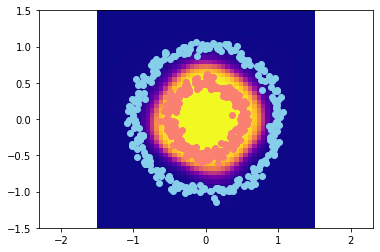

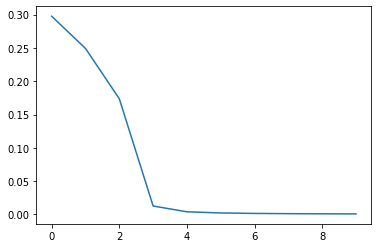

In [10]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

#NÚMERO DE ITERACIONES DE LA RED
for i in range(5000):
    
  #ENTRENAMIENTO
  pY = train(neural_n, X, Y, fcost, lr=0.01)
  
  if i % 500 == 0:
    
    print(pY)
  
    loss.append(fcost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, fcost, train=False)[0][0]    

    #VISUALIZACIÓN DE LOS DATOS
    plt.pcolormesh(_x0, _x1, _Y, cmap="plasma")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5) 